# Fullmetal Alchemist: Brotherhood Reviews - Tugas Mata Kuliah Visualisasi Data 8 : Text Visualization

**Name : Faiz Rofi Hencya**

**NIM  : 1301190230**

## **Introduction**

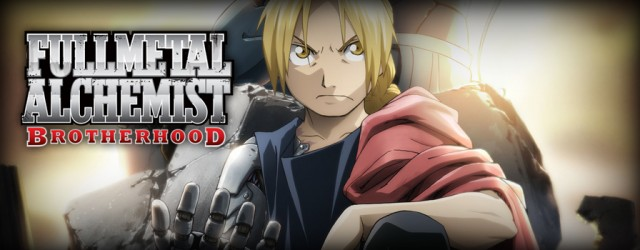

Fullmetal Alchemist: Brotherhood (Japanese: 鋼の錬金術師 Hagane no Renkin Justushi) adalah serial televisi animasi Jepang 2009 yang diadaptasi pada serial manga dengan nama Fullmetal Alchemist karya Hiromu Arakawa. Fullmetal Alchemist: Brotherhood diproduksi oleh Bones dan disutradai Yasuhiro Irie. Fullmetal Alchemist: Brotherhood terdiri 64 episode (list episode Fullmetal Alchemist: Brotherhood) dari April 2009 hingga Juli 2010.  Fullmetal Alchemist: Brotherhood merupakan serial televisi animasi kedua berdasarkan manga Fullmetal Alchemist.[1] Serial animasi pertama dengan nama yang sama yaitu Fullmetal Alchemist pada tahun 2003. Berbeda dengan adaptasi sebelumnya, Fullmetal Alchemist: Brotherhood merupakan adaptasi yang mengikuti alur asli manga. Anime ini mendapatkan rating 9.1/10 di IMDb.

## Import Libraries

In [49]:
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
import pandas as pd
import numpy as np
import warnings
import requests

from PIL import Image
from wordcloud import WordCloud
from tqdm import tqdm

import urllib.request
from PIL import Image

mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)
mpl.style.use(['ggplot'])

warnings.filterwarnings('ignore')

## Data Crawling

Base Review Sites : https://myanimelist.net/anime/5114/Fullmetal_Alchemist__Brotherhood/reviews

Proses crawling untuk mendapatkan dataset review pada situs [MyAnimeList](https://myanimelist.net/) dilakukan dengan menggunakan API Unoficiall milik Jikan. Basis dasar link yang digunakan untuk API ini adalah https://api.jikan.moe/v3/anime/{id_anime}/reviews/{page}.

Contoh penggunaan : https://api.jikan.moe/v3/anime/5114/reviews/0. Selanjutnya parameter page akan dilakukan perulangan dari 0 - 19 untuk mendapatkan keseluruhan review dataset.



In [17]:
reviews = []

for i in tqdm(range(0, 20)):
    result = requests.get(f'https://api.jikan.moe/v3/anime/5114/reviews/{i}')
    review = result.json().get('reviews')

    for j in range(len(review)):
        reviews.append([review[j].get('content'), review[j].get('date'), review[j].get('reviewer').get('scores').get('overall')])

100%|██████████| 20/20 [00:34<00:00,  1.73s/it]


In [18]:
# Membuat Dataframe dari dataset yang telah di crawl
df = pd.DataFrame(data=reviews, columns={
    'text': reviews[0],
    'created_at': reviews[1],
    'overall_score': reviews[2]}
)

# Memanggil Dataset dari csv
# df = pd.read_csv('FMA-reviews.csv')

print(f'Total Data Review : {len(df)}')

df.to_csv('FMA-reviews.csv', index=False)
df.sample(8)

Total Data Review : 400


,text,created_at,overall_score
378,Fullmetal Alchemist: BrotherhoodI've watched t...,2022-01-01T02:19:00+00:00,9
145,Wow so this story was definitly written by a w...,2011-05-27T05:24:00+00:00,7
340,The new improved Full metal alchemist is just ...,2009-10-24T06:29:00+00:00,10
228,Anyone who's familiar with anime has heard of ...,2012-07-04T00:33:00+00:00,8
310,Story (10/10):The story is incredible! It is w...,2021-03-17T03:47:00+00:00,10
376,Is Fullmetal Alchemist the greatest shounen of...,2020-09-27T19:41:00+00:00,10
332,SPOILER ALERT- you have been warned!!Y'know if...,2016-10-03T21:07:00+00:00,7
65,"Pros: Brilliant plot, excellent opening/ending...",2014-08-09T19:10:00+00:00,10


In [19]:
# Inisialisasi Set Untuk Key Kata Dan Value Jumlah Kata
word = {}

# Perulangan Setiap Kata Dan Perhitungannya Dalam Sebuah Dataframe
# Untuk Dimasukkan Kedalam Set
for i in range(len(df)):
    temp_text = df.loc[i]['text']
    temp_split = temp_text.split(' ')
    temp_set = list(set(temp_split))

    for j in range(len(temp_set)):
      try:
        word[temp_set[j]] += 1
      except:
        word[temp_set[j]] = 1

print(f'Total Character : {len(word)}')

Total Character : 21531


## Data Preprocessing

### Menghapus Data Duplikat

In [20]:
df.drop_duplicates(subset='text', inplace=True)
df.reset_index(inplace=True)

print(f'Total Data Sisa Penghapusan Duplikasi: {len(df)}')

Total Data Sisa Penghapusan Duplikasi: 380


### Visualisasi wordcloud sebelum data cleaning

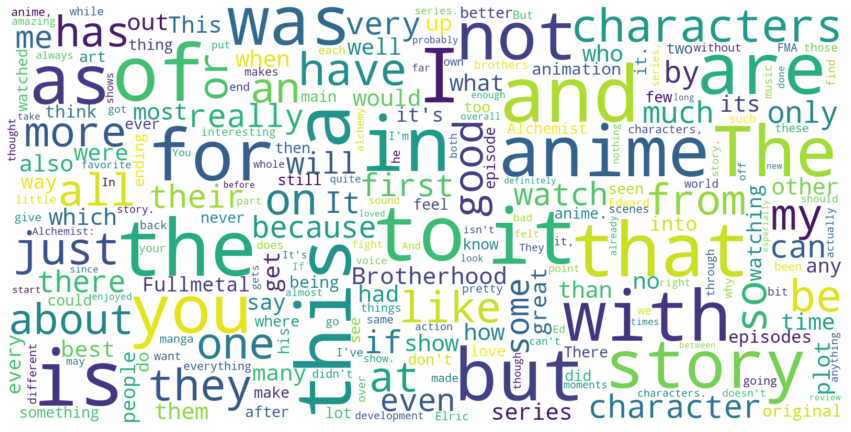

In [21]:
# Inisialisasi Set Untuk Key Kata Dan Value Jumlah Kata
word = {}

# Perulangan Setiap Kata Dan Perhitungannya Dalam Sebuah Dataframe
# Untuk Dimasukkan Kedalam Set
for i in range(len(df)):
    temp_text = df.loc[i]['text']
    temp_split = temp_text.split(' ')
    temp_set = list(set(temp_split))

    for j in range(len(temp_set)):
      try:
        word[temp_set[j]] += 1
      except:
        word[temp_set[j]] = 1

# Menginisialisasi Dan Menampilkan Wordcloud Berdasarkan Frekuensi Kata Dan Menampilkannya
wordcloud = WordCloud(width=1600, height=800, max_words=250, max_font_size=150, background_color='white').generate_from_frequencies(word)

plt.figure(figsize=(15, 12))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

### Data Cleaning

*   Dokumentasi Library SymSpell : https://github.com/wolfgarbe/symspell
*   Dokumentasi Library Preprocessor : https://github.com/s/preprocessor
*   Dokumentasi Library NLTK : https://www.nltk.org/api/nltk.html








In [37]:
pip install tweet-preprocessor


In [38]:
pip install symspellpy

     |████████████████████████████████| 2.6 MB 4.2 MB/s 
     |████████████████████████████████| 125 kB 44.5 MB/s 


In [39]:
import re
import string
import nltk
import pkg_resources
import preprocessor as p

from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from symspellpy.symspellpy import SymSpell

nltk.download('punkt')
nltk.download('wordnet')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [45]:
lemmatizer = nltk.stem.WordNetLemmatizer()
stop_words = set(stopwords.words('english'))

def tokenizing(text):
    # Mengubah setiap kata menjadi lowercase
    text =  text.lower()

    # Menghapus Karakter Selain Huruf a-z dan A-Z
    text = re.sub('[^a-zA-Z]', ' ', text)

    # Menghapus Tanda Baca Seperti Titik Dan Koma
    text = text.translate(str.maketrans(' ', ' ', string.punctuation))

    # Mengganti baris baru (enter) dengan spasi
    text = re.sub("\n", " ", text)

    # Menghapus Link Dengan Pattern http/https dan www
    text = re.sub('(@\w+|#\w+)', '', text)
    text = re.sub(r'http\S+', '', text)

    # Menghapus Tag HTML
    text = re.sub('<.*?>', '', text)

    # Menghapus Karakter Berulang (Contoh: ashiaaapppp!!!! menjadi ashiap!)
    text = re.sub(r'(\w)(\1{2,})', r"\1", text)

    # Menghapus 1 Karakter Terpisah
    text = re.sub(r"\b[a-zA-Z]\b", "", text)

    # Menghapus Spasi Yang Lebih Dari Satu
    text = re.sub('(s{2,})', ' ', text)

    # Mengembalikan Hasil Tokenizing Text
    return text


# Memisahkan Kata Singkatan (Abbreviaton). Contoh won't -> will not 
def decontracted(text):
    text = re.sub(r"\'re", " are", text)
    text = re.sub(r"\'s", " is", text)
    text = re.sub(r"\'m", " am", text)
    text = re.sub(r"n\'t", " not", text)
    text = re.sub(r"\'t", " not", text)
    text = re.sub(r"\'d", " would", text)
    text = re.sub(r"\'ll", " will", text)
    text = re.sub(r"\'ve", " have", text)

    return text


# Lematisasi adalah teknik  untuk mereduksi kata menjadi Lemma atau bentuk dasar dari sebuah kata
# Contoh:  better -> good
def lemmatizing_text(text):
    final_text = ''
    words = word_tokenize(text)

    for w in words:
        final_text += lemmatizer.lemmatize(w) + ' '

    return final_text
        

# Menghapus kata yang mengandung judul topik dan kata yang terdapat pada stopwords nltk 
def filtering_text(text):
    custom_word = ['fullmetal',"full","metal", 'alchemist', 'brotherhood']
    temp_text_split = []
    text_split = text.split(' ')

    for i in range(len(text_split)):
        if text_split[i] not in stop_words and len(text_split[i]) > 3 and text_split[i] not in custom_word:
            temp_text_split.append(text_split[i])
    
    temp_text_split = list(set(temp_text_split))
    final_text = ' '.join(temp_text_split)
    
    return final_text


# Word Segment melakukan pemisahan kata-kata yang tergabung. Contoh : ihateit -> i hate it
def word_segment(text):
    sym_spell = SymSpell(max_dictionary_edit_distance=0, prefix_length=7)
    dictionary_path = pkg_resources.resource_filename("symspellpy", "frequency_dictionary_en_82_765.txt")

    sym_spell.load_dictionary(dictionary_path, term_index=0, count_index=1)
    result = sym_spell.word_segmentation(text)

    return result.corrected_string


# Tambahan pembersihan dengan library tweet preprocessor
def tweet_preprocessor(text):
    return p.clean(text)  


# Proses data cleansing setiap text
df['text'] = df['text'].apply(word_segment)
df['text'] = df['text'].apply(decontracted)
df['text'] = df['text'].apply(tokenizing)
df['text'] = df['text'].apply(filtering_text)
df['text'] = df['text'].apply(lemmatizing_text)
df['text'] = df['text'].apply(tweet_preprocessor)

In [43]:
df['text'].sample(1).values[0]

'single answer every illustrate outside fine matter multiple cost familiarize building thing subjective unfortunately brother revolving different alongside character willing sacrifice critical complete frequent joke form lurking relates acro eventful applied proce best consume story especially luckily however follows equal relate detract used resolved make appeal existing meaningful scenario moment need intention take alchemist distinct execution outcome understanding temporarily consistently lucky waiting portraying pretty consequence human try behavior end open interdependent viewing description still fantastical colo fail interest worst immediate forced anything resolve personality watched give rural challenge challenge throughout elric core treat personal moving true criticize shape focus point appreciated series shown mother saying believable always mean worldly principle conclude strongly harne perform continue pretentious uneventful user relies searching recommend given bring pr

## Explorasi Data

### Word Cloud

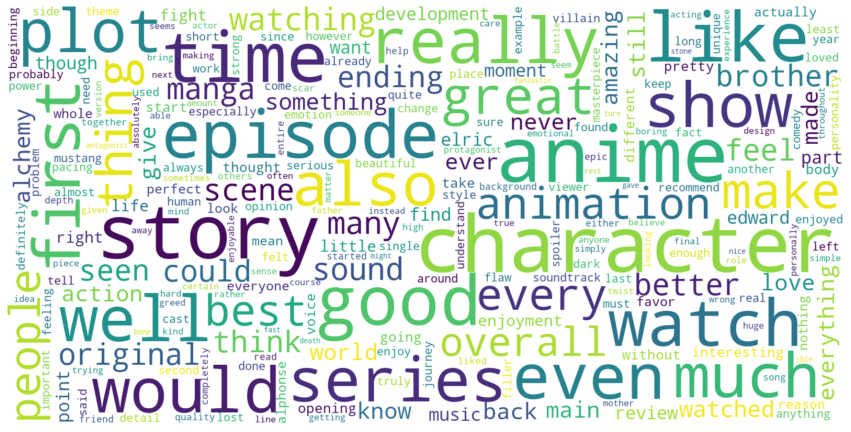

In [46]:
# Inisialisasi Set Untuk Key Kata Dan Value Jumlah Kata
word = {}

# Perulangan Setiap Kata Dan Perhitungannya Dalam Sebuah Dataframe
# Untuk Dimasukkan Kedalam Set
for i in range(len(df)):
    temp_text = df.loc[i]['text']
    temp_split = temp_text.split(' ')
    temp_set = list(set(temp_split))

    for j in range(len(temp_set)):
      try:
        word[temp_set[j]] += 1
      except:
        word[temp_set[j]] = 1

# Menginisialisasi Dan Menampilkan Wordcloud Berdasarkan Frekuensi Kata Dan Menampilkannya
wordcloud = WordCloud(width=1600, height=800, max_words=250, max_font_size=150, background_color='white').generate_from_frequencies(word)

plt.figure(figsize=(15, 12))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

## Masked Word Cloud

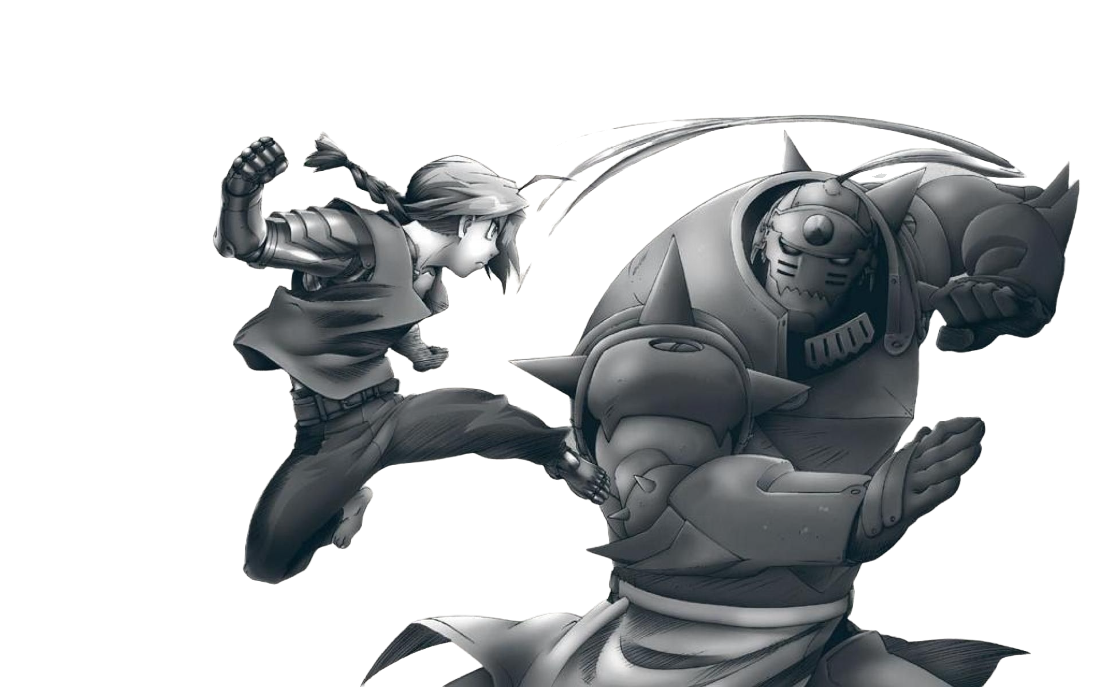

In [84]:
# Menampilkan Gambar Yang Akan Di Masked

urllib.request.urlretrieve(
  'https://github.com/Hencya/Visualisasi-Data-8-Text-Visualization/blob/main/fma.png?raw=true',
   "fma.png")
img = Image.open("fma.png")
display(img)

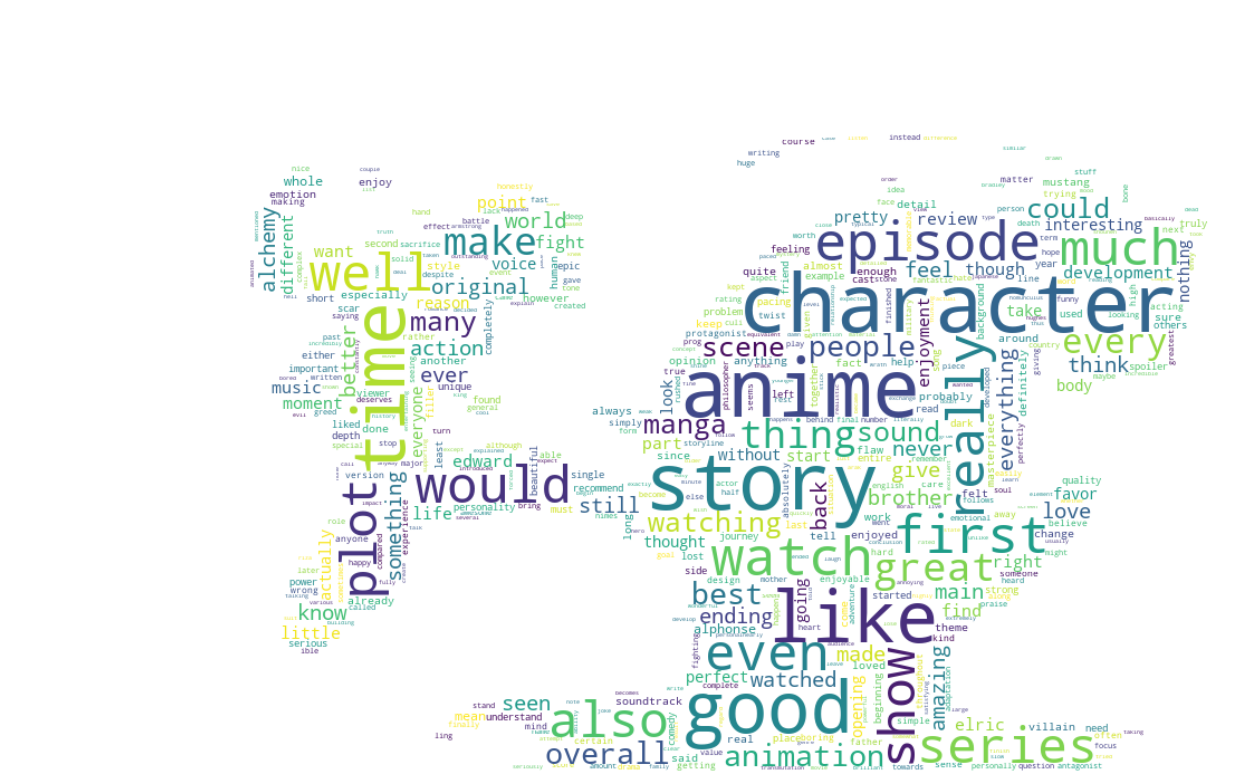

In [79]:
# Generate Wordcloud dari gambar yang akan di mask beserta menampilkannya
mask = np.array(Image.open('fma.png'))
wc = WordCloud(
        mask=mask, background_color="white",
        max_words=500, max_font_size=256,
        width=mask.shape[1],
        height=mask.shape[0]
).generate_from_frequencies(word)
               
plt.figure(figsize=(22, 18))
plt.imshow(wc, interpolation="bilinear")
plt.axis('off')
plt.show()

## Kesimpulan

Dari hasil visualisasi wordcloud dapat dilihat bahwa kata-kata yang mendominasi merupakan kata positif seperti : Good, like, Well, Best dan great dan ada juga beberapa topik terkait review yang di highlight pada wordcloud diatas adalah terkait Character, Anime, Story, Plot, Scene dan Series.